# ..Made by Cristiano Dos Anjos..
cristianodosanjos019@gmail.com

## This is a project of Investment. 

### In this project we are going to analyze some instruments of investment and decide which is better to invest our money. :)

We pick up this dataset from Kaggle website.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [2]:
df1 = pd.read_csv('C:/Users/7c4/Documents/Project-A/all_stocks_5yr.csv')
df1.head(3)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL


In [3]:
df1.isna().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

#### In the line above we can see that we have a total of 27 missing values in this data, let's take it off.

In [4]:
df = df1.dropna()

In [5]:
display(df)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


#### As we can see, this dataset have 619029 and 7 columns.

In [6]:
df.groupby('Name').sum()

,open,high,low,close,volume
Name,,,,,
A,61927.5200,62446.4739,61416.5707,61945.3500,2943590983
AAL,48333.6338,49045.0423,47622.4367,48337.1046,11822414547
AAP,166741.4949,168477.2362,164974.3554,166733.7300,1357256410
AAPL,137300.7850,138428.4580,136150.2604,137314.9734,68046305767
ABBV,76550.7260,77395.9335,75763.1891,76628.3300,9909189476
...,...,...,...,...,...
XYL,52142.0801,52580.7312,51714.7172,52165.5250,1489574691
YUM,94956.4223,95718.1484,94229.7471,94992.8200,4040170774
ZBH,132877.3950,133982.5966,131814.8301,132958.3200,1633103868


#### We have in this data 505 instruments of investment.

#### We wanna know which is the 2 better instruments of investment, but we have 505 instruments. Let's catch 2 intruments with highest profit according to the mean of close and open.

In [7]:
dm0 = df.groupby('Name').mean()

In [8]:
dm0.head(3)

,open,high,low,close,volume
Name,,,,,
A,49.187863,49.600059,48.782026,49.202025,2.338039e+06
AAL,38.390495,38.955554,37.825605,38.393252,9.390321e+06
AAP,132.439631,133.818297,131.036025,132.433463,1.078043e+06


In [9]:
dm0.index.name = None

In [10]:
dm0['diff'] = dm0['close']-dm0['open']

In [11]:
dm0.head(3)

,open,high,low,close,volume,diff
A,49.187863,49.600059,48.782026,49.202025,2.338039e+06,0.014162
AAL,38.390495,38.955554,37.825605,38.393252,9.390321e+06,0.002757
AAP,132.439631,133.818297,131.036025,132.433463,1.078043e+06,-0.006168


In [12]:
dm0['diff'].max()

0.1966719618743582

In [13]:
dm0[dm0['diff']>0.14].head(10)

,open,high,low,close,volume,diff
HUM,162.663558,164.425812,161.094037,162.812923,1.441347e+06,0.149365
MTD,356.100826,359.263210,353.079464,356.297498,1.703652e+05,0.196672
PCLN,1312.678483,1324.183184,1300.652212,1312.873538,6.302927e+05,0.195055
SHW,261.271160,263.437920,259.232103,261.451096,7.121122e+05,0.179936
TDG,214.956585,216.936464,212.993078,215.104202,5.122642e+05,0.147617


#### Now we know which is the instruments that has the highests profit in mean function. We will use the instruments MTD and PCLN for make tests and see which is the better choice to invest.

#### First let's get modeling ours news datasets.

In [14]:
dfsh = df[df['Name']=='SHW']
dfpc = df[df['Name']=='PCLN']

In [15]:
dfsh = dfsh.reset_index(drop=True)
dfpc = dfpc.reset_index(drop=True)

In [16]:
dfpc.tail(2), dfsh.tail(2)

(            date     open     high      low    close  volume  Name
 1257  2018-02-06  1800.01  1864.00  1800.01  1858.66  564479  PCLN
 1258  2018-02-07  1847.39  1900.37  1836.68  1882.68  491231  PCLN,
             date    open    high      low   close   volume Name
 1257  2018-02-06  388.00  406.04  383.885  405.00  1057495  SHW
 1258  2018-02-07  405.71  411.00  402.630  403.48   793075  SHW)

In [17]:
dfsh['close1'] = dfsh['close'].shift(-1)
dfpc['close1'] = dfpc['close'].shift(-1)

In [18]:
dfsh = dfsh.dropna()
dfpc = dfpc.dropna()

In [19]:
dfsh['LogReturn'] = np.log(dfsh['close'].shift(-1)) - np.log(dfsh['close'])
dfpc['LogReturn'] = np.log(dfpc['close'].shift(-1)) - np.log(dfpc['close'])
dfsh = dfsh.dropna()
dfpc = dfpc.dropna()

#### Let's make some hypotesis testing in a column of our investments's returns in logarithm. Before we will make a Standardization.

In [20]:
sxb = dfsh['LogReturn'].mean()
ss = dfsh['LogReturn'].std(ddof=1)
sn = dfsh['LogReturn'].shape[0]
szhat = (sxb-0)/(ss/(sn**0.5))
print(szhat)

1.9371314165283473


In [21]:
pxb = dfpc['LogReturn'].mean()
ps = dfpc['LogReturn'].std(ddof=1)
pn = dfpc['LogReturn'].shape[0]
pzhat = (pxb-0)/(ps/(pn**0.5))
print(pzhat)

1.6826549761367642


In [22]:
# This is the first hypothese of the instrument SHW and PCLN.
alpha = 0.05
zleft = norm.ppf(alpha/2,0,1)
zright = -zleft
print(zleft, zright)
print('At the significance level of 5%')
print('Shall we reject the hypothese in the instrument SHW?:', szhat>zright or szhat<zleft)
print('Shall we reject the hypothese in the instrument PCLN?:', pzhat>zright or pzhat<zleft)

-1.9599639845400545 1.9599639845400545
At the significance level of 5%
Shall we reject the hypothese in the instrument SHW?: False
Shall we reject the hypothese in the instrument PCLN?: False


In [23]:
alpha = 0.05
s_pvalue = 1 - norm.cdf(abs(szhat), 0, 1)
p_pvalue = 1 - norm.cdf(abs(pzhat), 0, 1)
print(s_pvalue, 'is the p-value of SHW')
print(p_pvalue, 'is the p-value of PCLN')
print('At the significance level of 5%')
print('Shall we reject?', s_pvalue < alpha)
print('Shall we reject?', p_pvalue < alpha)

0.026364640582674292 is the p-value of SHW
0.046220951222647244 is the p-value of PCLN
At the significance level of 5%
Shall we reject? True
Shall we reject? True


#### With the p-values that we got above we can see that we only can calculate the probability of the instrument SHW drop over even 2.5% by each operation, in the instrument PCLN we can calculate the chance of this instrument drop over even 4.5% by each operation.

In [24]:
pcmu = dfpc['LogReturn'].mean()
pcsigma = dfpc['LogReturn'].std(ddof=-1)

shmu = dfsh['LogReturn'].mean()
shsigma = dfsh['LogReturn'].std(ddof=-1)
print('The chance of our investment PCLN drop over 4.5% is:', norm.cdf(-0.045, pcmu, pcsigma),'%')
print('The chance of our investment SHW drop over 2.5% is:', norm.cdf(-0.025, shmu, shsigma),'%')

The chance of our investment PCLN drop over 4.5% is: 0.0025383949104285618 %
The chance of our investment SHW drop over 2.5% is: 0.0254380296103051 %


In the line above we can see that the instrument PCLN have 0.2% chance to drop over 4.5% in each day, and the instrument SHW also have 0.2% chance to drop over 2.5% in each operation.

#### Now we are going to see whether these instruments has a high chance get loss in determinate counting of days.

In [25]:
monthpcmu = 30*pcmu
monthpcsigma = (30**0.5)*pcsigma

monthshmu = 30*shmu
monthshsigma = (30**0.5)*shsigma

In [79]:
print('The chance of the instrument PCLN drop over 10% in 30 days is of:', norm.cdf(-0.10, monthpcmu, monthpcsigma),'%')
print('The chance of the instrument SHW drop over 10% in 30 days is of:', norm.cdf(-0.10, monthshmu, monthshsigma),'%')

The chance of the instrument PCLN drop over 10% in 30 days is of: 0.0841383079355717 %
The chance of the instrument SHW drop over 10% in 30 days is of: 0.04594715027125671 %


The instruments PCLN has 8.4% chance to drop over 10% in a month, and the SHW has 4.5% chance of having a monthly loss more than 10%.

In [27]:
print('The chance of the instrument PCLN drop over 15% in 30 days is of:', (norm.cdf(-0.15, monthpcmu, monthpcsigma)),'%')

The chance of the instrument PCLN drop over 15% in 30 days is of: 0.02639921537486727 %


With the line above we can see that the instrument PCLN has 8.4% chance of dropping over 15% monthly.

In [71]:
yearpcmu = 365*pcmu
yearshmu = 365*shmu

yearpcsigma = (365**0.5)*pcsigma
yearshsigma = (365**0.5)*shsigma

In [77]:
print('The chance of the instrument PCLN drop over 20% in a year is of:', norm.cdf(-0.20, yearpcmu, yearpcsigma))

The chance of the instrument PCLN drop over 20% in a year is of: 0.06078000009372767


In [78]:
print('The chance of the instrument SHW drop over 20% in a year is of:', norm.cdf(-0.20, yearshmu, yearshsigma))

The chance of the instrument SHW drop over 20% in a year is of: 0.03292956648456705


#### Now let´s calculate with the VAR or value of risk.

We will use the VAR to find out the percentage of risk in both instruments.

In [28]:
print('The instrument SHW have 5% chance to have a return of:', norm.ppf(0.05, shmu, shsigma))

The instrument SHW have 5% chance to have a return of: -0.02094710762177491


 With the method VAR we can see that the instrument SHW has 5% chance of falling over 2% in each operation.

In [29]:
print('The instrument PCLN have 5% chance to have a return of:', norm.ppf(0.05, pcmu, pcsigma))

The instrument PCLN have 5% chance to have a return of: -0.02609468508417123


As we can see in line above, the PCLN has 5% chance of dropping over 2.6% in each operation.

...

#### Now let's see the increase in earnings with some graphics and explaining the information.

In [30]:
dfsh.head(3)

,date,open,high,low,close,volume,Name,close1,LogReturn
0,2013-02-08,163.14,164.00,162.68,163.77,379624,SHW,164.50,0.004448
1,2013-02-11,163.44,164.69,162.65,164.50,559521,SHW,164.67,0.001033
2,2013-02-12,162.90,165.00,162.26,164.67,701728,SHW,165.45,0.004726


#### Let's get starded, creating a column called diff that is the difference between of return.

In [31]:
dfsh['diff'] = dfsh['close1']-dfsh['close']

dfpc['diff'] = dfpc['close1']-dfpc['close']
dfpc.head(3)

,date,open,high,low,close,volume,Name,close1,LogReturn,diff
0,2013-02-08,693.55,702.0400,691.4739,700.83,468310,PCLN,696.11,-0.006758,-4.72
1,2013-02-11,699.68,699.9999,692.1600,696.11,301513,PCLN,703.38,0.010390,7.27
2,2013-02-12,696.80,705.7700,695.3700,703.38,487096,PCLN,704.17,0.001123,0.79


<AxesSubplot:>

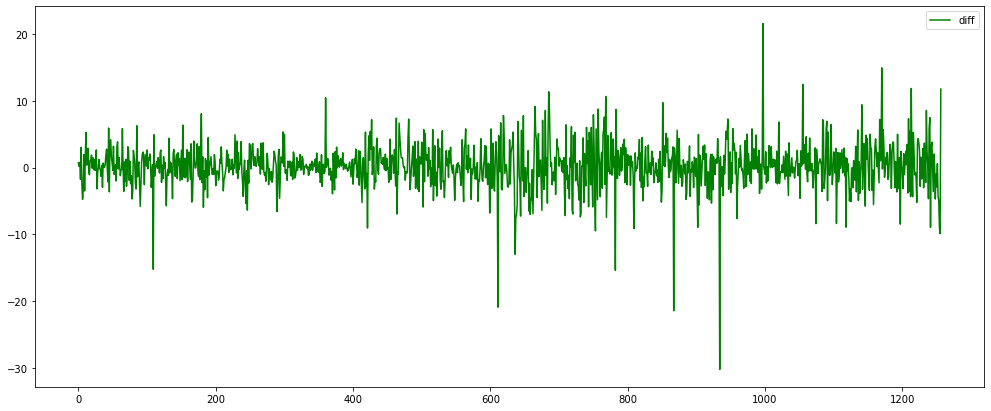

In [32]:
dfsh['diff'].plot(legend=True, figsize=(17,7), color='green')

<AxesSubplot:>

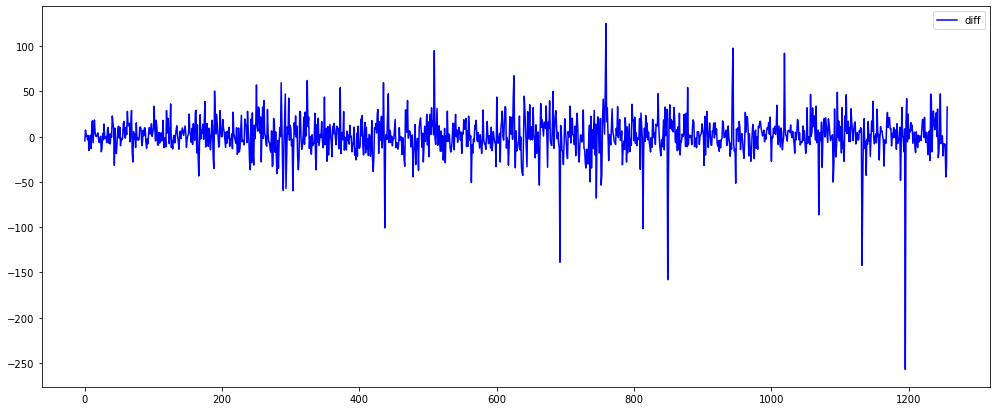

In [36]:
dfpc['diff'].plot(legend=True, figsize=(17,7), color='blue')

#### With the two graphs above, we can't see clearly, but we can say that these instrument had many losses.

#### Now we will find out the percentage of losses based in total number of operations.

In [61]:
shdiffg = [c for c in dfsh['diff'] if c >= 0]
shdiffl = [c for c in dfsh['diff'] if c < 0]

In [62]:
shdiffl = pd.DataFrame(shdiffl)
shdiffg = pd.DataFrame(shdiffg)

In [63]:
len(shdiffl), len(shdiffg)

(580, 677)

In [64]:
pcdiffg = [c for c in dfpc['diff'] if c >= 0]
pcdiffl = [c for c in dfpc['diff'] if c < 0]

In [66]:
pcdiffl = pd.DataFrame(pcdiffl)
pcdiffg = pd.DataFrame(pcdiffg)

In [67]:
len(pcdiffl), len(pcdiffg)

(597, 660)

In [38]:
len(dfpc), len(dfsh)

(1257, 1257)

...

In [57]:
1257*47.5

59707.5

In [69]:
1257*46.2

58073.4

+  ...

### Conclusions of the analysis of the instrument PCLN:

+ The instrument PCLN have 0.2% chance to have a loss of 4.5% per operation.
+ The instrument PCLN have 8.4% chance to have a loss of 10% per month with one operation per day.
+ The instrument PCLN have 6% chance to have a loss of 20% per year with one operation per day.

+ Using the value risk method, we know that the instrument PCLN have 5% chance to have a return 2.6% negative.

+ In a total of 1257 operations, the instrument PCLN had 47.5% of losses.

### Conclisions of the analysis of the instrument SHW:

+ The instrument SHW have 2.5% chance to have a loss of 2.5% per operation.
+ The instrument SHW have 4.5% chance to have a loss of 10% per month with one operation per day.
+ The instrument SHW have 3.2% chance to have a loss of 20% per year with one operation per day.

+ Using the value risk method, we know that the instrument SHW have 5% chance to have a return 2% negative.

+ In a total of 1257 operations, the instrument SHW had 46.2% of losses.

# Thanks for analysing with me. :)